# *Сеть персептронов*

#### 1. Установка библиотек

In [2]:

!pip install numpy
!pip install matplotlib
!pip install prettytable

#### 2. Импорт библиотек

In [3]:
import numpy as np
import random
from prettytable import PrettyTable
from matplotlib import pyplot as plt

#### 3. Шаблон нейросети

In [4]:
class Perceptron:
    #---ИНИЦИАЛИЗАЦИЯ ДАННЫХ---#
    def __init__(self,input_data:np.array, output_data, learning_rate):
        np.random.seed(7)
        self._x_train = input_data 
        print(self._x_train)
        
        self._y_train = output_data
        self._w = np.random.uniform(size=(1,self._x_train.shape[1]))
        self._all_train = {
            "input_data":[],
            "p_out": [],
            "w": []
        }
        self._lr = learning_rate
        self._index_list = list(range(input_data.shape[0]))
        
        
        
    #---МЕТОД ВЫВОДА ИНФОРМАЦИИ НА ЭКРАН---#
    def __show_train_info(self,x,y,p_out):
        outprint_W = ""
        for i in range(len(self._w)):
            for j in range(len(self._w[i])):
                outprint_W += (f"w{j} ={self._w[i][j]:5.2f} ")
        print(f"""Weights: {outprint_W}
Input Data:  {x[1:]}
Expected output {int(y)}  Predicated Output: {int(p_out)}""")
    
    
    def __draw_point(self,input_data, p_out):
        #print(len(input_data))
        #input_data = np.insert(input_data,-1,input_data[1]) if len(input_data) == 2 else None
            
        if p_out == -1:
            plt.scatter(input_data[2],input_data[1], color='blue', marker='_')
        else:
            plt.scatter(input_data[2],input_data[1], color='red', marker='+')


    def __draw_line(self, w ,color="green"):
        x1 = [-1.0, 1.0]
        
        #w = np.insert(w,-1,w[1]) if len(w) == 2 else None
        x2 = [-w[0][1]* x1[i]/w[0][2]  - w[0][0] / w[0][2] for i in range(len(x1))]
        
        plt.axline(*list(zip(x2,x1)), color=color)
    
    #---РАЗЛИЧНЫЕ ФУНКЦИИ АКТИВАЦИИ---#
    # def sigmoid(self, x:float): # Сигмоидная функция активации
    #     return 1/(1+np.exp(-x)) 
    # 
    # def relu(self, x:float): # Выпрямитель (RELu) 
    #     return np.maximum(0, x)
    
    def step_function(self,x:float): # Жесткая пороговая функция активации
        if x < 0: return -1
        else: return 1
    
    #---ОБУЧЕНИЕ ПЕРСЕПТРОНА---#
    def train(self): 
        all_correct = False
        while not all_correct:
            all_correct = True
            random.shuffle(self._index_list)
            
            
            for i in self._index_list:
                x = self._x_train[i]
                y = self._y_train[0][i]
                z = np.dot(self._w, x) # Скалярное произведение входа и весов
                p_out = self.step_function(z) # Применение функции активации, в данном случае применяем пошаговую функцию активации
                if  y != p_out: # Обновить веса, когда неправильно
                    print("____________________________\n 🔁 Updating the weights 🔁")
                    for j in range(0, len(self._w[0])):
                        self._w[0][j] += (y * self._lr * x[j]) # Процесс поправления весов (Процесс "обучения")
                    all_correct = False
                    self.__show_train_info(x,y,p_out) # Вывод информации (Во время обучения)
                self._all_train["input_data"].append(x)
                self._all_train["p_out"].append(p_out)
                self._all_train["w"].append(self._w.copy())
        print("____________________________\n ✅ Weights updated ✅")
        self.__show_train_info(x,y,p_out) # Вывод информации (Обученного персептрона)
        
    #---МЕТОД "ПРОГНОЗИРОВАНИЯ"---#        
    def predict(self, input_data:np.array):
        z = np.dot(self._w, input_data[0])
        return self.step_function(z)
    
    
    
    def show_all_training(self):
        plt.ylabel("x1")
        plt.xlabel("x2")
        plt.xlim([round(np.min(self._x_train,axis=0)[2])-0.1,round(np.max(self._x_train, axis=0)[2])+0.1])
        plt.ylim([round(np.min(self._x_train, axis=0)[1])-0.1,round(np.max(self._x_train, axis=0)[1])+0.1])
        
            
        for i in range(0,len(self._all_train["p_out"])):
            self.__draw_point(self._all_train["input_data"][i],self._all_train["p_out"][i])
        
        for i in range(0,len(self._all_train["w"])):
            color = "green" if i == len(self._all_train["w"]) - 1 else "red"
            self.__draw_line(self._all_train["w"][i], color=color)
            
            
        plt.show()
        
    
    def show_final_training(self):
        plt.ylabel("x1")
        plt.xlabel("x2")
        plt.xlim([round(np.min(self._x_train,axis=0)[2])-0.1,round(np.max(self._x_train, axis=0)[2])+0.1])
        plt.ylim([round(np.min(self._x_train, axis=0)[1])-0.1,round(np.max(self._x_train, axis=0)[1])+0.1])
        if self._x_train.shape[1] != 2:
            plt.xlim([round(np.min(self._x_train,axis=0)[2])-0.1,round(np.max(self._x_train, axis=0)[2])+0.1 ]) 
        else:
            plt.xlim([0,1])
            
        plt.ylim([round(np.min(self._x_train, axis=0)[1])-0.1,round(np.max(self._x_train, axis=0)[1])+0.1])
        
        
        for i in range(0,len(self._y_train[0])):
            
            self.__draw_point(self._x_train[i],self._y_train[0][i])

        self.__draw_line(self._w)
        plt.show()
        

#### 4. Константы и тренировочные данные

In [5]:
#--Константы и тренировочные данные--#
LEARNING_RATE = 0.01
x_train = np.array([(1.0,-1.0,-1.0),
           (1.0,-1.0,1.0),
           (1.0,1.0,-1.0),
           (1.0,1.0,1.0)])

#### 5. Создаём экземпляры персептронов под каждую задачу

In [6]:
#--Создание персептронов под каждую задачу--#
nand_perceptron = Perceptron(x_train, np.array([[1.0,1.0,1.0,-1.0]]), LEARNING_RATE)
or_perceptron = Perceptron(x_train, np.array([[-1.0,1.0,1.0,1.0]]), LEARNING_RATE)
and_perceptron = Perceptron(x_train, np.array([[-1.0,-1.0,-1.0,1.0]]), LEARNING_RATE)
not_perceptron = Perceptron(np.array([[1.0, -1.0],[1.0, 1.0]]), np.array([[1.0, -1.0]]), LEARNING_RATE)

[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
[[ 1. -1.]
 [ 1.  1.]]


#### 6. Обучаем персептроны

In [7]:
#--Обучаем каждый персептрон и выводим графики--#
not_perceptron.train()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.07 w1 = 0.77 
Input Data:  [1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.08 w1 = 0.76 
Input Data:  [-1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.09 w1 = 0.75 
Input Data:  [-1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.08 w1 = 0.74 
Input Data:  [1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.07 w1 = 0.73 
Input Data:  [1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.08 w1 = 0.72 
Input Data:  [-1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.07 w1 = 0.71 
Input Data:  [1.]
Expected output -1  Predicated

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.09 w1 = 0.77 w2 = 0.43 
Input Data:  [-1. -1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.08 w1 = 0.76 w2 = 0.42 
Input Data:  [1. 1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.09 w1 = 0.75 w2 = 0.43 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.10 w1 = 0.74 w2 = 0.42 
Input Data:  [-1. -1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.11 w1 = 0.73 w2 = 0.43 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.10 w1 = 0.72 w2 = 0.42 
Input Data:  [1. 1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weigh

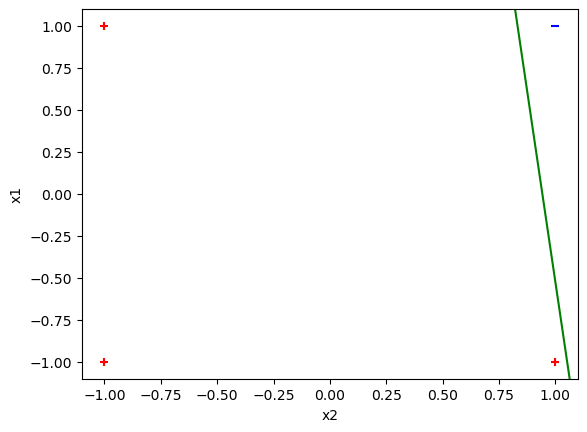

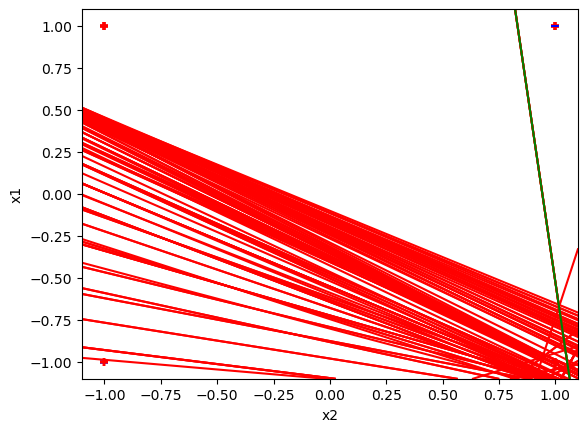

In [8]:
nand_perceptron.train()
nand_perceptron.show_final_training()
nand_perceptron.show_all_training()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.07 w1 = 0.77 w2 = 0.45 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.06 w1 = 0.76 w2 = 0.46 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.05 w1 = 0.75 w2 = 0.47 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.04 w1 = 0.74 w2 = 0.48 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.03 w1 = 0.73 w2 = 0.49 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.02 w1 = 0.72 w2 = 0.50 
Input Data:  [ 1. -1.]
Expected output -1  Predicated Output: 1
____________________________
 🔁 Updating the w

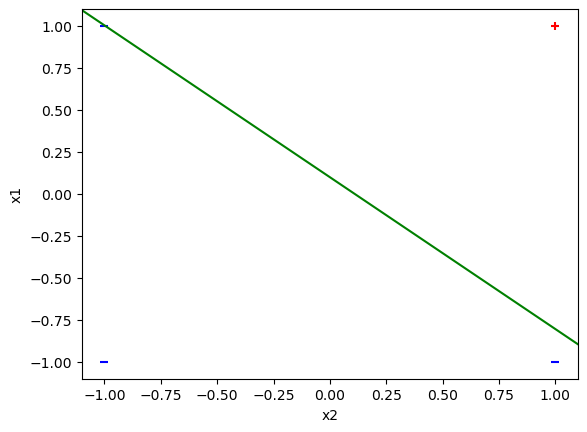

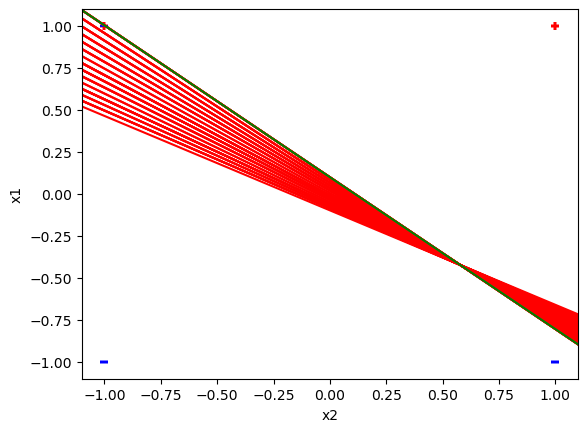

In [9]:
and_perceptron.train()
and_perceptron.show_final_training()
and_perceptron.show_all_training()

____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.09 w1 = 0.77 w2 = 0.45 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.10 w1 = 0.76 w2 = 0.46 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.11 w1 = 0.75 w2 = 0.47 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.12 w1 = 0.74 w2 = 0.48 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.13 w1 = 0.73 w2 = 0.49 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the weights 🔁
Weights: w0 = 0.14 w1 = 0.72 w2 = 0.50 
Input Data:  [-1.  1.]
Expected output 1  Predicated Output: -1
____________________________
 🔁 Updating the w

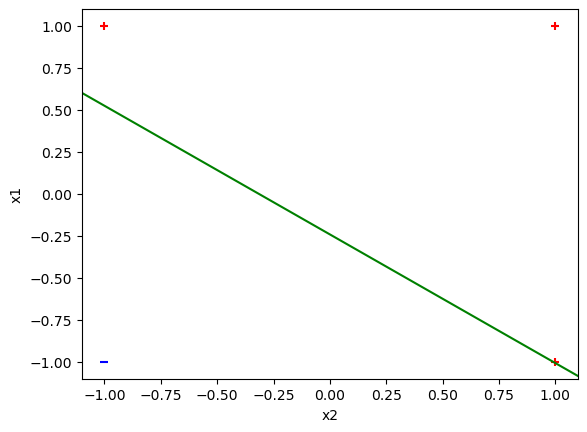

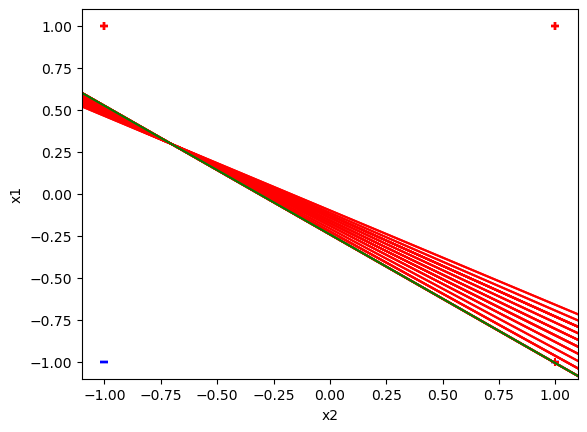

In [10]:
or_perceptron.train()
or_perceptron.show_final_training()
or_perceptron.show_all_training()

#### 7. Из обученных персептронов создаём логическую цепь

In [14]:
x_test = np.array([(1.0,-1.0,-1.0,-1.0),
                   (1.0,-1.0,-1.0,1.0),
                   (1.0, -1.0,1.0,-1.0),
                   (1.0, -1.0,1.0,1.0),
                   (1.0, 1.0,-1.0,-1.0),
                   (1.0, 1.0,-1.0,1.0),
                   (1.0, 1.0, 1.0, -1.0),
                   (1.0, 1.0, 1.0, 1.0)]) #(<bias>, <x1>, <x2>, <x3>)

pt = PrettyTable(["x1", "x2", "x3","¬(x1 ∧ x2)","¬(¬(x1 ∧ x2))", "x1 ⊕ x3","F"]) #Создание таблицы с соответствующими названиями столбцов
output = []
#--Создание логической цепи--#
for i in range(len(x_test)):
    not_block = not_perceptron.predict(np.array([(1.0, 
                                      nand_block := nand_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][2])])))
                                     ])
                           )
    xor_block = and_perceptron.predict(np.array([(1.0, 
                                            nand_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][3])])), 
                                            or_perceptron.predict(np.array([(x_test[i][0], x_test[i][1], x_test[i][3])])))
                                           ]) 
                                 )
    
    output.append(and_perceptron.predict(np.array([(1.0, not_block, xor_block)])))
    pt.add_row([x_test[i][1], x_test[i][2],x_test[i][3], nand_block,not_block, xor_block, output[i]])
print(pt) #Вывод таблицы

+------+------+------+------------+---------------+---------+----+
|  x1  |  x2  |  x3  | ¬(x1 ∧ x2) | ¬(¬(x1 ∧ x2)) | x1 ⊕ x3 | F  |
+------+------+------+------------+---------------+---------+----+
| -1.0 | -1.0 | -1.0 |     1      |       -1      |    -1   | -1 |
| -1.0 | -1.0 | 1.0  |     1      |       -1      |    1    | -1 |
| -1.0 | 1.0  | -1.0 |     1      |       -1      |    -1   | -1 |
| -1.0 | 1.0  | 1.0  |     1      |       -1      |    1    | -1 |
| 1.0  | -1.0 | -1.0 |     1      |       -1      |    1    | -1 |
| 1.0  | -1.0 | 1.0  |     1      |       -1      |    -1   | -1 |
| 1.0  | 1.0  | -1.0 |     -1     |       1       |    1    | 1  |
| 1.0  | 1.0  | 1.0  |     -1     |       1       |    -1   | -1 |
+------+------+------+------------+---------------+---------+----+
